In [ ]:
 'C1=NC2=C(N1)C(=S)N=CN2 , CC(C)C(=O)NC1=CC(=C(C=C1)[N+](=O)[O-])C(F)(F)F , CCC(=O)N(C1CCN(CC1)CCC2=CC=CC=C2)C3=CC=CC=C3 , C(CCl)NC(=O)N(CCCl)N=O , CN(CC1=CN=C2C(=N1)C(=NC(=N2)N)N)C3=CC=C(C=C3)C(=O)N[C@@H](CCC(=O)O)C(=O)O , C1=CC=C(C(=C1)C(C2=CC=C(C=C2)Cl)C(Cl)Cl)Cl , C1=C(C(=O)NC(=O)N1)F , COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C)OCCOC'

C1=NC2=C(N1)C(=S)N=CN2 , CC(C)C(=O)NC1=CC(=C(C=C1)[N+](=O)[O-])C(F)(F)F , CCC(=O)N(C1CCN(CC1)CCC2=CC=CC=C2)C3=CC=CC=C3 , C(CCl)NC(=O)N(CCCl)N=O , CN(CC1=CN=C2C(=N1)C(=NC(=N2)N)N)C3=CC=C(C=C3)C(=O)N[C@@H](CCC(=O)O)C(=O)O , C1=CC=C(C(=C1)C(C2=CC=C(C=C2)Cl)C(Cl)Cl)Cl , C1=C(C(=O)NC(=O)N1)F , COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C)OCCOC

In [5]:
from rdkit.Chem.inchi import *
from rdkit.Chem.inchi import InchiToInchiKey

In [4]:
print(MolFromInchi("SGNXVBOIDPPRJJ-UHFFFAOYSA-N"))

None


In [15]:
from urllib.request import urlopen
from urllib.parse import quote
import py3Dmol
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw



def visualize_molecule(inchikey, width=300, height=300):
    try:
        url = 'http://cactus.nci.nih.gov/chemical/structure/' + quote(inchikey) + '/smiles'
        ans = urlopen(url).read().decode('utf8')
        smiles = ans
    except:
        return "Invalid InChIKey"
    
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        raise ValueError("Invalid SMILES string")

    # Generate 3D coordinates
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol)
    AllChem.MMFFOptimizeMolecule(mol)

    # Generate 3D visualization
    viewer = py3Dmol.view(width=width, height=height)
    
    # Convert molecule to Mol block
    mol_block = Chem.MolToMolBlock(mol)
    viewer.addModel(mol_block, 'mol')
    
    # Set atom style
    atom_style = {'stick': {'colorscheme': 'Jmol', 'radius': 0.1}}  # Adjust radius as needed
    viewer.setStyle(atom_style)
    
    # Additional settings
    viewer.setBackgroundColor('white')
    viewer.zoomTo()
    viewer.show()


if __name__ == "__main__":
    inchikey = "SGNXVBOIDPPRJJ-UHFFFAOYSA-N" # Example SMILES string
    img = visualize_molecule(inchikey)




You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [16]:
from rdkit import Chem

# Create a molecule with atoms
mol = Chem.MolFromSmiles('CCO')  # Example: ethanol molecule (CH3CH2OH)

# Now you can use your existing code to visualize the molecule
viewer = py3Dmol.view(width=400, height=400)
viewer.addModel(Chem.MolToMolBlock(mol), "mol")
viewer.setStyle({'stick':{'radius':0.05}})
viewer.setBackgroundColor('white')
viewer.zoomTo()
viewer.show()


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem

def generate_3d_molfile_from_smiles(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        # Generate 3D coordinates
        AllChem.EmbedMolecule(mol, randomSeed=42)  # You can change the randomSeed value

        # Generate Molfile
        mol_block = Chem.MolToMolBlock(mol)
        return mol_block
    else:
        return None

# Example usage:
smiles_example = 'OC[C@@H](O1)[C@@H](O)[C@H](O)[C@@H](O)[C@@H](O)1'
molfile_3d = generate_3d_molfile_from_smiles(smiles_example)

if molfile_3d is not None:
    print(molfile_3d)
else:
    print("Invalid SMILES input.")


     RDKit          3D

 12 12  0  0  0  0  0  0  0  0999 V2000
    3.4213    0.1062    0.2489 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.4440   -0.8549    0.0634 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1006   -0.1773    0.2369 C   0  0  1  0  0  0  0  0  0  0  0  0
    0.9991    0.8200   -0.7052 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.0303   -1.2303    0.1275 C   0  0  1  0  0  0  0  0  0  0  0  0
    0.1050   -2.0091    1.2996 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3288   -0.5677    0.1483 C   0  0  2  0  0  0  0  0  0  0  0  0
   -2.2879   -1.5127   -0.1276 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3267    0.5065   -0.9385 C   0  0  1  0  0  0  0  0  0  0  0  0
   -2.5483    1.1914   -0.8083 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.2032    1.4791   -0.7087 C   0  0  1  0  0  0  0  0  0  0  0  0
   -0.4053    2.2489    0.4284 O   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  3  2  1  6
  3  4  1  0
  3  5  1  0
  5  6  1  1
  5  7  1  0
  7  8  1  6
  7 

[11:09:33] Molecule does not have explicit Hs. Consider calling AddHs()


In [9]:
from rdkit import Chem
from rdkit.Chem import AllChem
import py3Dmol

def visualize_molecule_in_html(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        mol_block = Chem.MolToMolBlock(mol)
        
        # Generate 3D structure
        mol = Chem.AddHs(mol)
        AllChem.EmbedMolecule(mol)
        AllChem.UFFOptimizeMolecule(mol, maxIters=500, vdwThresh=1e6)

        # Use Py3Dmol to create HTML content
        viewer = py3Dmol.view(width=800, height=600)
        viewer.addModel(mol_block, 'mol')
        viewer.setStyle({'stick': {}})
        viewer.setBackgroundColor('white')
        viewer.zoomTo()
        
        # Corrected: Use render() to get HTML content as a string
        html_content = viewer.render()

        # Save the HTML content to a file
        with open('molecule_viewer.html', 'w') as f:
            f.write(html_content)

if __name__ == "__main__":
    smiles_input = input("Enter SMILES string: ")
    visualize_molecule_in_html(smiles_input)


Enter SMILES string:  CCO


TypeError: write() argument must be str, not view

In [3]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

def generate_3d_structure(molecule):
    mol = Chem.MolFromSmiles(molecule)
    if mol:
        mol = Chem.AddHs(mol)
        AllChem.EmbedMolecule(mol, randomSeed=42)
        AllChem.UFFOptimizeMolecule(mol, maxIters=500, vdwThresh=1e6)

        return mol
    else:
        return None

def display_molecule(molecule):
    if molecule:
        Draw.MolToImage(molecule).show()
    else:
        print("Invalid SMILES string.")

def save_3d_mol_file(molecule, filename="molecule_3d.mol"):
    if molecule:
        with open(filename, 'w') as file:
            file.write(Chem.MolToMolBlock(molecule))
        print(f"3D structure saved as {filename}")
    else:
        print("Invalid SMILES string.")

def main():
    smiles_input = input("Enter SMILES string: ")
    molecule = generate_3d_structure(smiles_input)
    display_molecule(molecule)

    save_option = input("Do you want to save the 3D structure as a .mol file? (yes/no): ")
    if save_option.lower() == "yes":
        filename = input("Enter the filename (default is 'molecule_3d.mol'): ")
        save_3d_mol_file(molecule, filename)
    else:
        print("Exiting without saving.")

if __name__ == "__main__":
    main()


Exiting without saving.


In [13]:
import py3Dmol
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

def visualize_molecule(smiles, width=600, height=600):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        raise ValueError("Invalid SMILES string")

    # Generate 3D coordinates
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol)
    AllChem.MMFFOptimizeMolecule(mol)

    # Generate 3D visualization
    viewer = py3Dmol.view(width=width, height=height)
    viewer.addModel(Chem.MolToMolBlock(mol), "mol")
    viewer.setStyle({'stick':{}})
    viewer.setBackgroundColor('white')
    viewer.zoomTo()
    viewer.show()


if __name__ == "__main__":
    smiles = "COC1CCN(c2cc(-c3ccc(N4CCCCC4)nc3)c3[nH]nc(-c4ccncc4)c3c2)C1"  # Example SMILES string
    img = visualize_molecule(smiles)


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [11]:
import py3Dmol
from rdkit import Chem
from rdkit.Chem import AllChem

def visualize_molecule(smiles, width=600, height=600):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        raise ValueError("Invalid SMILES string")

    # Generate 3D coordinates
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol)
    AllChem.MMFFOptimizeMolecule(mol)

    # Generate 3D visualization
    viewer = py3Dmol.view(width=width, height=height)
    
    # Convert molecule to Mol block
    mol_block = Chem.MolToMolBlock(mol)
    viewer.addModel(mol_block, 'mol')
    
    # Set atom style
    atom_style = {'stick': {'colorscheme': 'Jmol', 'radius': 0.1}}  # Adjust radius as needed
    viewer.setStyle(atom_style)
    
    # Additional settings
    viewer.setBackgroundColor('white')
    viewer.zoomTo()
    viewer.show()

if __name__ == "__main__":
    smiles = "COC1CCN(c2cc(-c3ccc(N4CCCCC4)nc3)c3[nH]nc(-c4ccncc4)c3c2)C1"  # Example SMILES string
    visualize_molecule(smiles)


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [12]:
import py3Dmol
from rdkit import Chem
from rdkit.Chem import AllChem

def visualize_molecule(smiles, width=600, height=600):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        raise ValueError("Invalid SMILES string")

    # Generate 3D coordinates
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol)
    AllChem.MMFFOptimizeMolecule(mol)

    # Generate 3D visualization
    viewer = py3Dmol.view(width=width, height=height)
    
    # Convert molecule to Mol block
    mol_block = Chem.MolToMolBlock(mol)
    viewer.addModel(mol_block, 'mol')
    
    # Set atom style
    atom_style = {'stick': {'colorscheme': 'Jmol', 'radius': 0.2}}  # Adjust radius as needed
    viewer.setStyle(atom_style)
    
    # Add ball-and-stick representation for atoms
    viewer.setStyle({'sphere': {}}, {'stick': {}})
    
    # Set colors for specific atom types
    atom_colors = {'C': 'grey', 'H': 'white', 'O': 'red', 'N': 'blue'}
    for atom in mol.GetAtoms():
        atom_symbol = atom.GetSymbol()
        if atom_symbol in atom_colors:
            viewer.setColorForElement(atom_symbol, atom_colors[atom_symbol])
    
    # Additional settings
    viewer.setBackgroundColor('white')
    viewer.zoomTo()
    viewer.show()

if __name__ == "__main__":
    smiles = "COC1CCN(c2cc(-c3ccc(N4CCCCC4)nc3)c3[nH]nc(-c4ccncc4)c3c2)C1"  # Example SMILES string
    visualize_molecule(smiles)


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [21]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
import base64
from io import BytesIO
import py3Dmol


def generate_molecule_image(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        img = Draw.MolToImage(mol, size=(350, 350))
        img_buffer = BytesIO()
        img.save(img_buffer, format="PNG")
        img_str = base64.b64encode(img_buffer.getvalue()).decode("utf-8")
        return img_str
    else:
        return None

def generate_3d_viewer(smiles):
    mol_block = Chem.MolToMolBlock(Chem.MolFromSmiles(smiles))
    viewer = py3Dmol.view(width=400, height=400)
    viewer.addModel(mol_block, format='sdf')
    viewer.setStyle({'stick': {}})
    viewer.setBackgroundColor('white')
    viewer.zoomTo()
    return viewer.embed()

In [22]:
smiles = 'OC[C@@H](O1)[C@@H](O)[C@H](O)[C@@H](O)[C@@H](O)1' 
mol = Chem.MolFromSmiles(smiles)

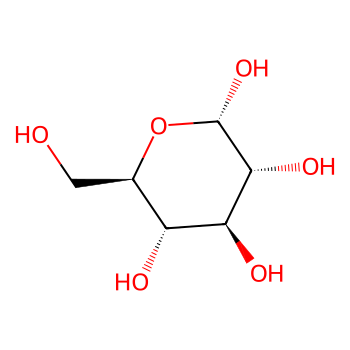

In [23]:
img = Draw.MolToImage(mol, size=(350, 350))
img

In [24]:
viewer_3d = generate_3d_viewer(smiles)
viewer_3d

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [28]:
from rdkit import Chem
from rdkit.Chem import AllChem
import py3Dmol

def generate_3d_structure(smiles):
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)  # Add hydrogens
    AllChem.EmbedMolecule(mol, AllChem.ETKDG())  # 3D structure generation
    return mol

def draw_3d_structure(mol, width=300, height=300):
    viewer = py3Dmol.view(width=width, height=height)
    viewer.addModel(Chem.MolToMolBlock(mol), 'mol')
    viewer.setStyle({'stick': {}})
    viewer.setBackgroundColor('white')
    viewer.zoomTo()
    return viewer

smiles_example = "OC[C@@H](O1)[C@@H](O)[C@H](O)[C@@H](O)[C@@H](O)1"  # Ethanol
mol_example = generate_3d_structure(smiles_example)
viewer_example = draw_3d_structure(mol_example)
viewer_example.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [29]:

# Example usage:
# smiles_example = "OC[C@@H](O1)[C@@H](O)[C@H](O)[C@@H](O)[C@@H](O)1"  # Ethanol
'''
OC[C@@H](O1)[C@@H](O)[C@H](O)[C@@H](O)[C@@H](O)1
CN=C=O
'''
smiles_example = "OC[C@@H](O1)[C@@H](O)[C@H](O)[C@@H](O)[C@@H](O)1"  # Ethanol
mol_example = generate_3d_structure(smiles_example)
viewer_example = draw_3d_structure(mol_example)
viewer_example.show()


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [19]:
from rdkit import Chem

mol = Chem.MolFromSmiles('CCO')
print(Chem.MolToMolBlock(mol))



     RDKit          2D

  3  2  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5981   -0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
M  END



In [22]:
def draw_3d_structure(mol, width=300, height=300):
    viewer = py3Dmol.view(width=width, height=height)

    # Add custom labels for atoms
    atom_labels = [f"{atom.GetSymbol()}{atom.GetIdx()}({atom.GetFormalCharge()})"
                   for atom in mol.GetAtoms()]

    # Atom color based on element
    atom_colors = [f'CPK:{atom.GetAtomicNum()}' for atom in mol.GetAtoms()]

    # Display molecular information
    mol_formula = rdMolDescriptors.CalcMolFormula(mol)
    mol_weight = rdMolDescriptors.CalcExactMolWt(mol)
    mol_info = f"Molecular Formula: {mol_formula}<br>" \
               f"Molecular Weight: {mol_weight:.2f}"

    viewer.addModel(Chem.MolToMolBlock(mol), 'mol')
    
    # Atom style customization
    viewer.setStyle({'stick': {}})
    viewer.addStyle({'label': atom_labels, 'color': atom_colors, 'radius': 0.3}, {'mode': 'stick'})

    # Bond style customization
    viewer.setStyle({'stick': {}})
    viewer.addStyle({'stick': {'radius': 0.2}}, {'mode': 'stick'})

    # Background color and zoom
    viewer.setBackgroundColor('lightgray')
    viewer.zoomTo()

    return viewer, mol_info

# Example usage:
smiles_example = "OC[C@@H](O1)[C@@H](O)[C@H](O)[C@@H](O)[C@@H](O)1"  # Ethanol
mol_example = generate_3d_structure(smiles_example)
viewer_example, mol_info_example = draw_3d_structure(mol_example)
viewer_example.show()


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [24]:
from rdkit import Chem
from rdkit.Chem import AllChem, rdMolDescriptors
import py3Dmol
import os

def generate_3d_structure(smiles):
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)  # Add hydrogens
    AllChem.EmbedMolecule(mol, AllChem.ETKDG())  # 3D structure generation
    return mol

def draw_3d_structure(mol, filename, width=300, height=300):
    viewer = py3Dmol.view(width=width, height=height)

    # Add custom labels for atoms
    atom_labels = [f"{atom.GetSymbol()}{atom.GetIdx()}({atom.GetFormalCharge()})"
                   for atom in mol.GetAtoms()]

    # Atom color based on element
    atom_colors = [f'CPK:{atom.GetAtomicNum()}' for atom in mol.GetAtoms()]

    # Display molecular information
    mol_formula = rdMolDescriptors.CalcMolFormula(mol)
    mol_weight = rdMolDescriptors.CalcExactMolWt(mol)
    mol_info = f"Molecular Formula: {mol_formula}<br>" \
               f"Molecular Weight: {mol_weight:.2f}"

    viewer.addModel(Chem.MolToMolBlock(mol), 'mol')
    
    # Atom style customization
    viewer.setStyle({'stick': {}})
    viewer.addStyle({'label': atom_labels, 'color': atom_colors, 'radius': 0.3}, {'mode': 'stick'})

    # Bond style customization
    viewer.setStyle({'stick': {}})
    viewer.addStyle({'stick': {'radius': 0.2}}, {'mode': 'stick'})

    # Background color and zoom
    viewer.setBackgroundColor('lightgray')
    viewer.zoomTo()

    # Additional information display
    viewer.addLabel(mol_info, {'fontSize': 14, 'position': {'x': 0, 'y': 0, 'z': 1}})

    # Save the 3D structure as an HTML file
    viewer.savefig(filename)

    return filename

# Example usage:
smiles_example = "OC[C@@H](O1)[C@@H](O)[C@H](O)[C@@H](O)[C@@H](O)1"  # Ethanol
mol_example = generate_3d_structure(smiles_example)
filename_example = "example_3d_structure.html"
filename_example = draw_3d_structure(mol_example, filename_example)
filename_example

'example_3d_structure.html'

https://github.com/ISMB-ECCB-2019-Tutorial-AM4/reproducible-computational-workflows/blob/master/3-jupyter/3D_visualization.ipynb

In [31]:
viewer = py3Dmol.view(query='pdb:5WOG')
viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [32]:
viewer.setStyle({'chain':'A'},{'cartoon': {'color': 'orange'}})
viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [33]:


viewer.setStyle({'chain':['A','B']},{'cartoon': {'color': 'orange'}}) # alpha subunits of hemoglobin

viewer.addLabel('alpha subunits', {'fontColor':'orange', 'backgroundColor':'lightgray'},
                {'chain': ['A','B']})

viewer.setStyle({'chain':['C','D']},{'cartoon': {'color': 'blue'}}) # beta subunits of hemoglobin

viewer.addLabel('beta subunits', {'fontColor':'blue', 'backgroundColor':'lightgray'},
                {'chain': ['C','D']})
viewer.show()



You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [34]:


viewer.setStyle({'resn': 'HEM'},{'sphere': {'colorscheme': 'greenCarbon'}})
viewer.show()



You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [35]:
# remove labels and reset styles
viewer.removeAllLabels()
viewer.setStyle({'line':{}})

# select by distance
selection = {'resn':'HEM', 'chain':'A', 'byres':'true', 'expand': 5}

# set styles
viewer.setStyle(selection,{'stick':{'colorscheme':'orangeCarbon'}})
viewer.setStyle({'chain': 'A', 'resn': 'HEM'},{'sphere': {'colorscheme': 'lightgreenCarbon'}})
viewer.zoomTo(selection)
viewer.show()


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [36]:


viewer = py3Dmol.view(query='pdb:5XS3')

heavychain = {'chain':'A'}
lightchain = {'chain':'B'}
antigen = {'chain':'C'}

viewer.setStyle(heavychain,{'cartoon':{'color':'blue'}})
viewer.setStyle(lightchain,{'cartoon':{'color':'yellow'}})
viewer.setStyle(antigen,{'sphere':{'colorscheme':'orangeCarbon'}})

viewer.addSurface(py3Dmol.SES,{'opacity':0.9,'color':'lightblue'}, heavychain)
viewer.show()



You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [17]:
import py3Dmol
view = py3Dmol.view(width=900, height=900, query='pdb:1zni', viewergrid=(2,2), linked=True)


In [18]:
view.setStyle({'cartoon': {'color': 'spectrum'}}, viewer=(0,0))
view.setStyle({'chain': 'A'}, {'cartoon': {'color': '#4aa6ff', 'style': 'parabola'}}, viewer=(0,1))
view.setStyle({'chain': 'B'}, {'cartoon': {'color': '#f65fab', 'style': 'edged'}}, viewer=(0,1)) 
view.setStyle({'chain': 'C'}, {'stick': {'colorscheme': 'cyanCarbon'}}, viewer=(0,1))
view.setStyle({'chain': 'D'}, {'stick': {'color': 'silver'}}, viewer=(0,1))
view.setStyle({'cartoon': {'color': 'spectrum'}}, viewer=(1,0))
view.setStyle({'elem': 'Zn'}, {'sphere': {'scale': 2.0}}, viewer=(1,0))
view.setStyle({'sphere': {'color': '#CCD1D1'}}, viewer=(1,1))
view.addSurface(py3Dmol.VDW, {'opacity': 0.5}, viewer=(0,0))
view.setBackgroundColor('#ebf4fb', viewer=(0,0))
view.setBackgroundColor('#cda9fc', viewer=(0,1))
view.setBackgroundColor('#e6e6e6', viewer=(1,0))
view.setBackgroundColor('#f6f2f7', viewer=(1,1))
view.render()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [26]:
import pandas as pd
from io import StringIO
from rdkit import Chem
from rdkit.Chem import (
    AllChem,
    rdCoordGen,
)
from rdkit.Chem.Draw import IPythonConsole

IPythonConsole.ipython_useSVG = True  # Use higher quality images for molecules
import py3Dmol
from ipywidgets import interact, Dropdown

# https://www.andersle.no/posts/2022/rdkitandpy3dmol/rdkit.html#a-longer-example-explore-molecules

In [27]:
data_set = StringIO(
    """names,smiles
Amigdalin,N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c1ccccc1
Fenfuram,Cc1occc1C(=O)Nc1ccccc1
citral,CC(C)=CCCC(C)=CC=O
Picene,c1ccc2c(c1)ccc1c2ccc2c3ccccc3ccc21
Thiophene,c1ccsc1
benzothiazole,c1ccc2scnc2c1
"2,2,4,6,6'-PCB",Clc1cc(Cl)c(-c2c(Cl)cccc2Cl)c(Cl)c1
Estradiol,CC12CCC3c4ccc(O)cc4CCC3C1CCC2O
Dieldrin,ClC1=C(Cl)C2(Cl)C3C4CC(C5OC45)C3C1(Cl)C2(Cl)Cl
Rotenone,C=C(C)C1Cc2c(ccc3c2OC2COc4cc(OC)c(OC)cc4C2C3=O)O1
2-pyrrolidone,O=C1CCCN1
2-Chloronapthalene,Clc1ccc2ccccc2c1
1-Pentene ,C=CCCC
Primidone,CCC1(c2ccccc2)C(=O)NCNC1=O
Tetradecane,CCCCCCCCCCCCCC
2-Chloropropane,CC(C)Cl
2-Methylbutanol,CCC(C)CO
Benzonitrile,N#Cc1ccccc1
Diazinon,CCOP(=S)(OCC)Oc1cc(C)nc(C(C)C)n1
2-Undecanol,CCCCCCCCCC(C)O"""
)

In [28]:
table = pd.read_csv(data_set)
table

,names,smiles
0,Amigdalin,N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c...
1,Fenfuram,Cc1occc1C(=O)Nc1ccccc1
2,citral,CC(C)=CCCC(C)=CC=O
3,Picene,c1ccc2c(c1)ccc1c2ccc2c3ccccc3ccc21
4,Thiophene,c1ccsc1
5,benzothiazole,c1ccc2scnc2c1
6,"2,2,4,6,6'-PCB",Clc1cc(Cl)c(-c2c(Cl)cccc2Cl)c(Cl)c1
7,Estradiol,CC12CCC3c4ccc(O)cc4CCC3C1CCC2O
8,Dieldrin,ClC1=C(Cl)C2(Cl)C3C4CC(C5OC45)C3C1(Cl)C2(Cl)Cl
9,Rotenone,C=C(C)C1Cc2c(ccc3c2OC2COc4cc(OC)c(OC)cc4C2C3=O)O1


In [29]:
def molecule_to_3d(molecule):
    """Add 3D coordinates for RDKit molecules."""
    mol = Chem.Mol(molecule)
    mol = AllChem.AddHs(mol, addCoords=True)
    AllChem.EmbedMolecule(mol)
    AllChem.MMFFOptimizeMolecule(mol)
    return mol


def molecules_from_smiles(smiles):
    """Generate RDKit molecules from smiles."""
    molecules = []
    for smilei in smiles:
        mol = Chem.MolFromSmiles(smilei)
        rdCoordGen.AddCoords(mol)
        molecules.append(mol)
    return molecules



In [30]:
names = table["names"].values
smiles = table["smiles"].values

molecules = molecules_from_smiles(smiles)
molecules_3d = [molecule_to_3d(i) for i in molecules]



In [32]:
def view_2d(molecule):
    return molecule


molecules_options = [(i, j) for i, j in zip(names, molecules)]

dropdown = Dropdown(
    options=molecules_options, value=molecules[0], description="Molecule:"
)

interact(
    view_2d,
    molecule=dropdown,
)



interactive(children=(Dropdown(description='Molecule:', options=(('Amigdalin', <rdkit.Chem.rdchem.Mol object a…

<function __main__.view_2d(molecule)>

In [33]:
def view_3d(molecule):
    view = py3Dmol.view(
        data=Chem.MolToMolBlock(molecule),  # Convert the RDKit molecule for py3Dmol
        style={"stick": {}, "sphere": {"scale": 0.3}}
    )
    view.zoomTo()
    return view


molecules_options = [(i, j) for i, j in zip(names, molecules_3d)]

dropdown = Dropdown(
    options=molecules_options, value=molecules_3d[0], description="Molecule:"
)

interact(
    view_3d,
    molecule=dropdown,
)

interactive(children=(Dropdown(description='Molecule:', options=(('Amigdalin', <rdkit.Chem.rdchem.Mol object a…

<function __main__.view_3d(molecule)>